In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [70]:
# Cargar los datos
df = pd.read_csv('./data/results.csv')
df['date'] = pd.to_datetime(df['date'])

In [71]:
df.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False


In [77]:
# Ejecutar el análisis
def analizar_ventaja_local(df):
    # Preparación de datos
    df['true_home'] = (df['neutral'] == False) & (df['country'] == df['home_team'])
    
    # Calcular resultados
    df['resultado'] = np.where(df['home_score'] > df['away_score'], 'Victoria',
                             np.where(df['home_score'] == df['away_score'], 'Empate', 'Derrota'))
    
    # 1. Análisis general de ventaja local
    ventaja_local = df[~df['neutral']]['resultado'].value_counts(normalize=True) * 100
    
    # 2. Análisis de verdadera localía
    true_home_results = df.groupby('true_home')['resultado'].value_counts(normalize=True).unstack() * 100
    
    # 3. Análisis por décadas
    df['decade'] = (df['date'].dt.year // 10) * 10
    decada_results = df[~df['neutral']].groupby('decade')['resultado'].value_counts(normalize=True).unstack() * 100
    
    # 4. Análisis de torneos principales
    torneos_principales = ['FIFA World Cup', 'UEFA Euro', 'Copa América']
    df_torneos = df[df['tournament'].isin(torneos_principales)]
    torneo_results = df_torneos.groupby('tournament')['resultado'].value_counts(normalize=True).unstack() * 100
    
    # 5. Diferencia de goles
    df['gol_diff'] = df['home_score'] - df['away_score']
    diff_goles = df.groupby(['neutral'])['gol_diff'].agg(['mean', 'count', 'std']).round(2)
    
    return {
        'ventaja_local': ventaja_local,
        'true_home_results': true_home_results,
        'decada_results': decada_results,
        'torneo_results': torneo_results,
        'diff_goles': diff_goles
    }

# Ejecutar el análisis
resultados = analizar_ventaja_local(df)

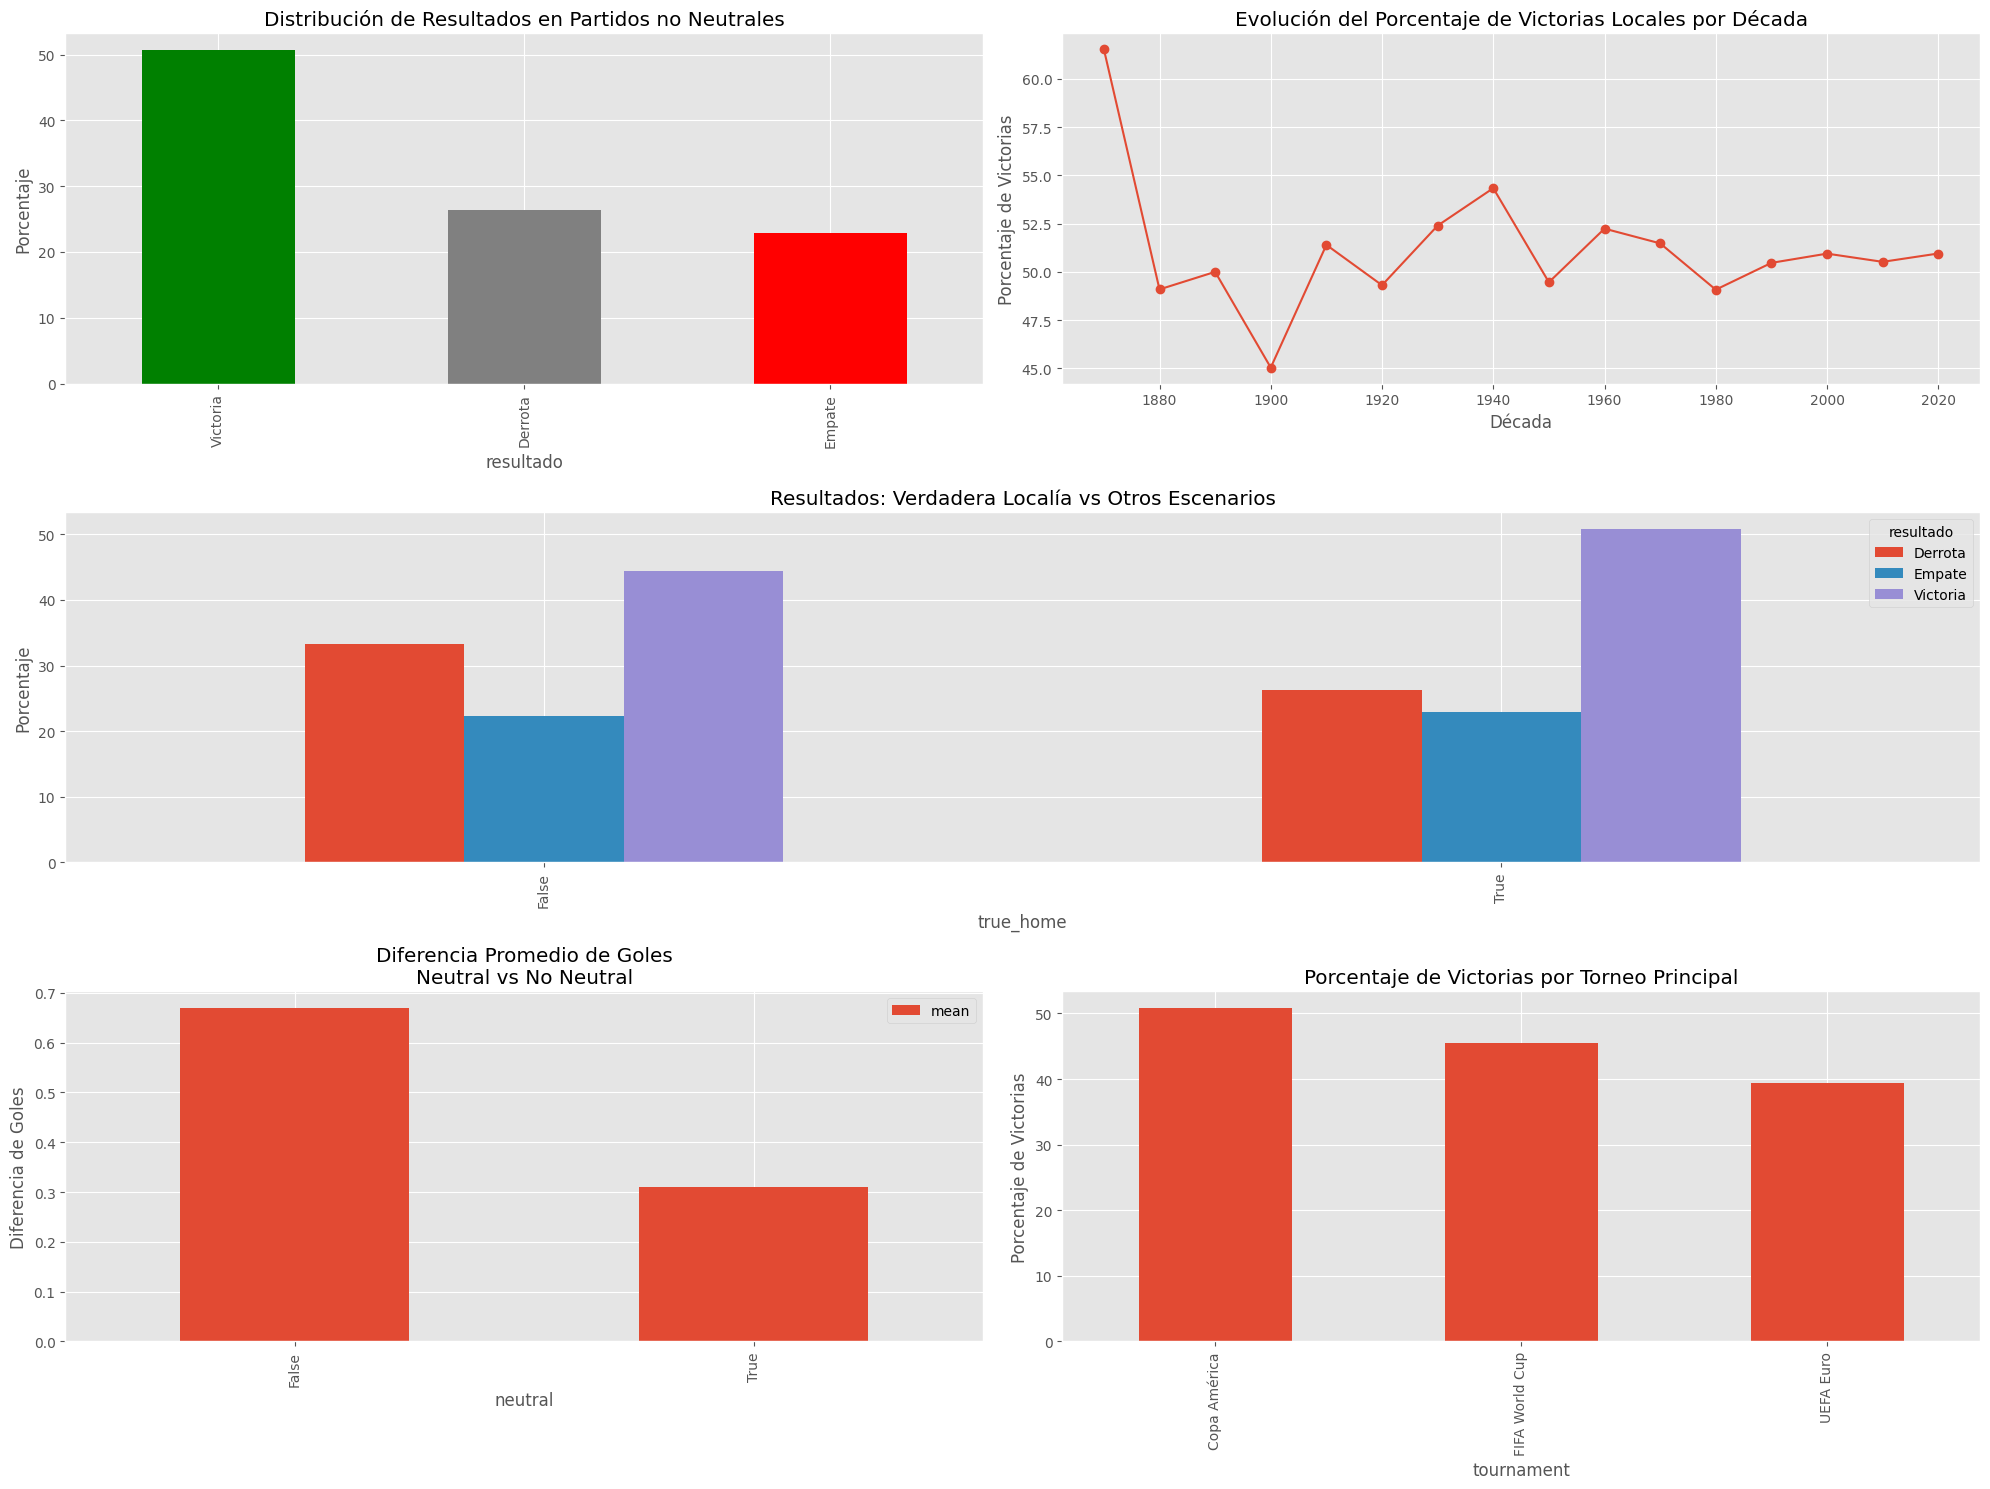


RESULTADOS DETALLADOS DEL ANÁLISIS:

1. Distribución general de resultados (no neutral):
resultado
Victoria    50.717947
Derrota     26.398369
Empate      22.883684
Name: proportion, dtype: float64

2. Resultados por tipo de localía:
resultado    Derrota     Empate   Victoria
true_home                                 
False      33.291504  22.255850  44.452646
True       26.246727  22.947338  50.805935

3. Victorias locales por década:
decade
1870    61.538462
1880    49.090909
1890    50.000000
1900    45.038168
1910    51.398601
1920    49.307479
1930    52.396166
1940    54.337900
1950    49.461538
1960    52.240143
1970    51.476933
1980    49.076305
1990    50.465992
2000    50.944993
2010    50.519181
2020    50.951306
Name: Victoria, dtype: float64

4. Resultados por torneo principal:
resultado         Derrota     Empate   Victoria
tournament                                     
Copa América    27.376861  21.764032  50.859107
FIFA World Cup  32.261411  22.199170  45.539419
UEFA

In [80]:
# Crear visualizaciones
plt.style.use('ggplot')
fig = plt.figure(figsize=(20, 15))
gs = plt.GridSpec(3, 2, figure=fig)

# 1. Gráfico de barras para resultados generales
ax1 = fig.add_subplot(gs[0, 0])
resultados['ventaja_local'].plot(kind='bar', ax=ax1, color=['green', 'gray', 'red'])
ax1.set_title('Distribución de Resultados en Partidos no Neutrales')
ax1.set_ylabel('Porcentaje')

# 2. Gráfico de líneas para evolución temporal
ax2 = fig.add_subplot(gs[0, 1])
resultados['decada_results']['Victoria'].plot(kind='line', marker='o', ax=ax2)
ax2.set_title('Evolución del Porcentaje de Victorias Locales por Década')
ax2.set_xlabel('Década')
ax2.set_ylabel('Porcentaje de Victorias')

# 3. Gráfico de barras para true home vs otros
ax3 = fig.add_subplot(gs[1, :])
resultados['true_home_results'].plot(kind='bar', ax=ax3)
ax3.set_title('Resultados: Verdadera Localía vs Otros Escenarios')
ax3.set_ylabel('Porcentaje')

# 4. Gráfico de diferencia de goles
ax4 = fig.add_subplot(gs[2, 0])
resultados['diff_goles'][['mean']].plot(kind='bar', ax=ax4)
ax4.set_title('Diferencia Promedio de Goles\nNeutral vs No Neutral')
ax4.set_ylabel('Diferencia de Goles')

# 5. Gráfico para torneos principales
ax5 = fig.add_subplot(gs[2, 1])
resultados['torneo_results']['Victoria'].plot(kind='bar', ax=ax5)
ax5.set_title('Porcentaje de Victorias por Torneo Principal')
ax5.set_ylabel('Porcentaje de Victorias')

plt.tight_layout()
plt.show()

# Imprimir resultados numéricos
print("\nRESULTADOS DETALLADOS DEL ANÁLISIS:")
print("\n1. Distribución general de resultados (no neutral):")
print(resultados['ventaja_local'])

print("\n2. Resultados por tipo de localía:")
print(resultados['true_home_results'])

print("\n3. Victorias locales por década:")
print(resultados['decada_results']['Victoria'])

print("\n4. Resultados por torneo principal:")
print(resultados['torneo_results'])

print("\n5. Estadísticas de diferencia de goles:")
print(resultados['diff_goles'])

In [65]:
print(events.columns)

Index(['50_50', 'ball_receipt_outcome', 'ball_recovery_recovery_failure',
       'block_deflection', 'block_offensive', 'carry_end_location',
       'clearance_aerial_won', 'clearance_body_part', 'clearance_head',
       'clearance_left_foot', 'clearance_other', 'clearance_right_foot',
       'counterpress', 'dribble_nutmeg', 'dribble_outcome', 'dribble_overrun',
       'duel_outcome', 'duel_type', 'duration', 'foul_committed_advantage',
       'foul_committed_offensive', 'foul_committed_penalty',
       'foul_committed_type', 'foul_won_advantage', 'foul_won_defensive',
       'goalkeeper_body_part', 'goalkeeper_end_location', 'goalkeeper_outcome',
       'goalkeeper_position', 'goalkeeper_punched_out', 'goalkeeper_technique',
       'goalkeeper_type', 'id', 'index', 'interception_outcome', 'location',
       'match_id', 'minute', 'off_camera', 'out', 'pass_aerial_won',
       'pass_angle', 'pass_assisted_shot_id', 'pass_body_part', 'pass_cross',
       'pass_cut_back', 'pass_deflected